In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [63]:
movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [64]:
print(movie.shape)
movie

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [65]:
ratings = rating.loc[:,["userId","movieId","rating"]]
ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [66]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [67]:
data = pd.merge(tags,movie, on="movieId")
df = data.merge(rating, on="movieId")
df.columns

Index(['userId_x', 'movieId', 'tag', 'timestamp_x', 'title', 'genres',
       'userId_y', 'rating', 'timestamp_y'],
      dtype='object')

In [68]:
df #최종 데이터를 만들어냄

,userId_x,movieId,tag,timestamp_x,title,genres,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,2,5.0,1445714980
1,2,60756,funny,1445714994,Step Brothers (2008),Comedy,18,3.0,1455749449
2,2,60756,funny,1445714994,Step Brothers (2008),Comedy,62,3.5,1528934376
3,2,60756,funny,1445714994,Step Brothers (2008),Comedy,68,2.5,1269123243
4,2,60756,funny,1445714994,Step Brothers (2008),Comedy,73,4.5,1464196221
...,...,...,...,...,...,...,...,...,...
233208,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,380,4.0,1494036091
233209,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,469,3.0,965661994
233210,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,599,4.0,1498498587
233211,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,603,5.0,963177579


In [69]:

df.groupby('title')['rating'].mean().head()

title
(500) Days of Summer (2009)          3.666667
...And Justice for All (1979)        3.166667
10 Cloverfield Lane (2016)           3.678571
10 Things I Hate About You (1999)    3.527778
101 Dalmatians (1996)                3.074468
Name: rating, dtype: float64

In [70]:
# 평균적인 rating을 바탕으로 rating 점수를 살펴보기
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Come and See (Idi i smotri) (1985)     5.0
Lady Jane (1986)                       5.0
Woman Under the Influence, A (1974)    5.0
Into the Woods (1991)                  5.0
Two Family House (2000)                5.0
Name: rating, dtype: float64

In [71]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [72]:
ratings_mean_count = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468
...,...
Zero Dark Thirty (2012),4.107143
Zombieland (2009),3.877358
Zoolander (2001),3.509259


In [73]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [74]:
ratings_mean_count.head()

,rating,rating_counts
title,,
(500) Days of Summer (2009),3.666667,336
...And Justice for All (1979),3.166667,3
10 Cloverfield Lane (2016),3.678571,28
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,94


# 히스토그램으로 살펴보기 

<AxesSubplot:>

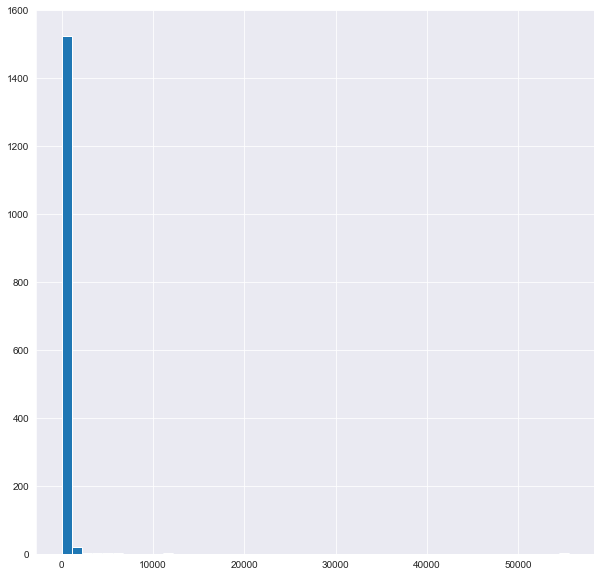

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(10,10))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

# rating 점수를 시각화 해보기

<AxesSubplot:>

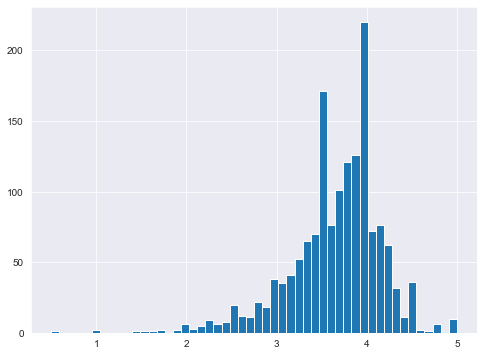

In [76]:

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)


<Figure size 576x432 with 0 Axes>

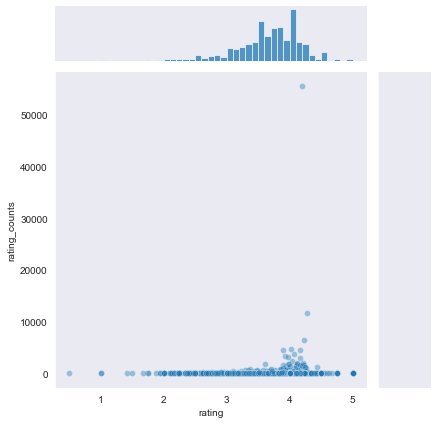

In [77]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [78]:
df

,userId_x,movieId,tag,timestamp_x,title,genres,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,2,5.0,1445714980
1,2,60756,funny,1445714994,Step Brothers (2008),Comedy,18,3.0,1455749449
2,2,60756,funny,1445714994,Step Brothers (2008),Comedy,62,3.5,1528934376
3,2,60756,funny,1445714994,Step Brothers (2008),Comedy,68,2.5,1269123243
4,2,60756,funny,1445714994,Step Brothers (2008),Comedy,73,4.5,1464196221
...,...,...,...,...,...,...,...,...,...
233208,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,380,4.0,1494036091
233209,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,469,3.0,965661994
233210,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,599,4.0,1498498587
233211,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,603,5.0,963177579


# pivot 테이블 만들기 

In [80]:


# pivot and create movie-user matrix
user_to_movie_df = df.pivot(
    
     columns='title',
      values='rating').fillna(0)

user_to_movie_df.head()

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from scipy.sparse import csr_matrix
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df

<233213x1554 sparse matrix of type '<class 'numpy.float64'>'
	with 233213 stored elements in Compressed Sparse Row format>

In [83]:
# cosine을 가지고 similarity 분석 

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [84]:

## simmilarity user에대한 함수
def get_similar_users(user, n = 5):
 
  knn_input = np.asarray([user_to_movie_df.values[user-1]])  #.reshape(1,-1)
 
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [85]:
df

,userId_x,movieId,tag,timestamp_x,title,genres,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,2,5.0,1445714980
1,2,60756,funny,1445714994,Step Brothers (2008),Comedy,18,3.0,1455749449
2,2,60756,funny,1445714994,Step Brothers (2008),Comedy,62,3.5,1528934376
3,2,60756,funny,1445714994,Step Brothers (2008),Comedy,68,2.5,1269123243
4,2,60756,funny,1445714994,Step Brothers (2008),Comedy,73,4.5,1464196221
...,...,...,...,...,...,...,...,...,...
233208,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,380,4.0,1494036091
233209,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,469,3.0,965661994
233210,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,599,4.0,1498498587
233211,610,3265,heroic bloodshed,1493843978,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,603,5.0,963177579


In [88]:

from pprint import pprint
user_id = 2
print(" Few of movies seen by the User:")
pprint(list(df[df['userId_y'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Step Brothers (2008)',
 'Warrior (2011)',
 'Warrior (2011)']
Top 5 users who are very much similar to the User- 2 are: 
 
1 . User: 153 separated by distance of 0.0
2 . User: 149 separated by distance of 0.0
3 . User: 152 separated by distance of 0.0
4 . User: 148 separated by distance of 0.0
5 . User: 150 separated by distance of 0.0


No history found
